# <center> $\color{red}{\text{Topic2: Customer Segmentation}}$ </center>

### Business Objective/Problem

● Công ty X chủ yếu bán các sản phẩm là quà 
tặng dành cho những dịp đặc biệt. Nhiều 
khách hàng của công ty là khách hàng bán 
buôn.<br>
● Công ty X mong muốn có thể bán được nhiều 
sản phẩm hơn cũng như giới thiệu sản phẩm 
đến đúng đối tượng khách hàng, chăm sóc và 
làm hài lòng khách hàng.

### <font color="darkblue"> Triển khai dự án </font>

#### <font color="red"> Bước 1: Business Understanding </font>

Dựa vào mô tả nói trên => xác định vấn đề: <br>
- Tìm ra giải pháp giúp cải thiện hiệu quả quảng bá, từ đó 
giúp tăng doanh thu bán hàng, cải thiện mức độ hài lòng 
của khách hàng.<br> 
- => Mục tiêu/ vấn đề: Xây dựng hệ thống phân cụm khách 
hàng dựa trên các thông tin do công ty cung cấp từ đó có 
thể giúp công ty xác định các nhóm khách hàng khác nhau 
để có chiến lược kinh doanh, chăm sóc khách hàng phù 
hợp.

#### <font color="red"> Bước 2: Data Understanding/ Acquire </font>

Từ mục tiêu/ vấn đề đã xác định: Xem xét các dữ 
liệu cần thiết:
- Toàn bộ dữ liệu được lưu trữ trong tập tin 
OnlineRetail.csv với 541.909 record chứa tất cả các giao 
dịch xảy ra từ ngày 01/12/2010 đến 09/12/2011 đối với 
bán lẻ trực tuyến.
- Mô tả dữ liệu: 
https://archive.ics.uci.edu/ml/datasets/online+retail

Attribute Information:

- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, the name of the country where each customer resides.

#### <font color="red"> Bước 3: Data preparation/ Prepare </font>

In [ ]:
!pip install squarify

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import plotly.express as px
import squarify
from datetime import datetime
import pandas_profiling as pp 

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
%matplotlib inline

In [ ]:
#Đọc dữ liệu
data = pd.read_csv('OnlineRetail.csv', encoding = 'unicode_escape')

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.00,United Kingdom


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#Tạo thêm cột mới Gross_sales = UnitPrice * Quantity

In [ ]:
data['Gross_sales'] = data['UnitPrice'] * data['Quantity']
data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Gross_sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.00,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.00,United Kingdom,20.34


#Xóa các dòng trong InvoiceNo bắt đầu bằng C

In [ ]:
#tìm những dòng có InvoiceNo bắt đầu bằng chữ 'C' (cancel)
data[data.InvoiceNo.str.startswith('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Gross_sales
141,C536379,D,Discount,-1,01-12-2010 09:41,27.50,14527.00,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 09:49,4.65,15311.00,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01-12-2010 10:24,1.65,17548.00,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.00,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.00,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,09-12-2011 09:57,0.83,14397.00,United Kingdom,-9.13
541541,C581499,M,Manual,-1,09-12-2011 10:28,224.69,15498.00,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,09-12-2011 11:57,10.95,15311.00,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,09-12-2011 11:58,1.25,17315.00,United Kingdom,-1.25


In [ ]:
#giữ lại những dòng có InvoiceNo không bắt đầu bằng C trong dataframe
data = data[data.InvoiceNo.str.startswith('C') == False]
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Gross_sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.00,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.00,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.00,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.00,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.00,United Kingdom,20.34


#Xóa các dòng có Gross_sales <0

In [ ]:
#chúng ta cần xóa các dòng có Gross_sales < 0 do các dòng này là khách hàng cancel
data[data['Gross_sales'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Gross_sales
299983,A563186,B,Adjust bad debt,1,12-08-2011 14:51,-11062.06,NaN,United Kingdom,-11062.06
299984,A563187,B,Adjust bad debt,1,12-08-2011 14:52,-11062.06,NaN,United Kingdom,-11062.06


In [ ]:
#Giữ lại các dòng có Gross_sales >= 0:
data = data[data['Gross_sales'] >= 0]

In [ ]:
#kiểm tra phân bổ của các quốc gia theo giao dịch:
temp = data.groupby(['Country'],as_index=False).agg({'InvoiceNo':'nunique'}).rename(columns = {'InvoiceNo':'Orders'})
total = temp['Orders'].sum(axis=0)
temp['%Orders'] = round((temp['Orders']/total)*100,4)
temp.sort_values(by=['%Orders'],ascending=False,inplace=True)
temp.reset_index(drop=True,inplace=True)

Text(0, 0.5, '%Orders')

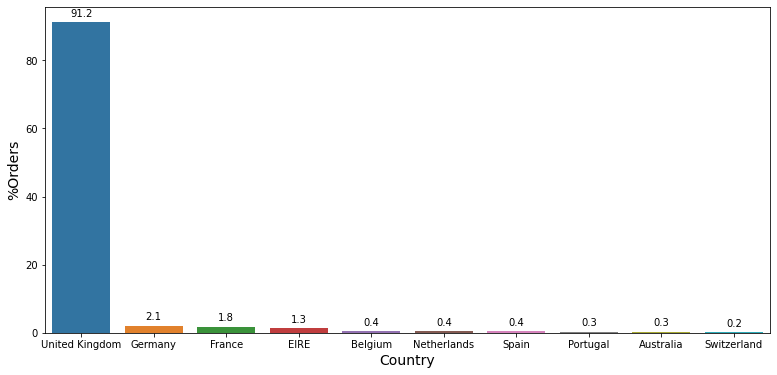

In [ ]:
plt.figure(figsize=(13,6))
splot=sns.barplot(x="Country",y="%Orders",data=temp[:10])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Country", size=14)
plt.ylabel("%Orders", size=14)

- Khoảng 90% giao dịch được thực hiện tại UK, số lượng tại các quốc gia khác rất nhỏ, gần 10% tồng số giao dịch => ít ảnh hưởng đến xu hướng chung => lựa chọn phân tích tại quốc gia UK

In [ ]:
# Lọc lấy data theo UK, bởi vì có 90% data tập trung ở UK
data = data[data.Country == 'United Kingdom']

In [ ]:
data.Country.unique()

array(['United Kingdom'], dtype=object)

**Nhận xét**
* Để làm bài toán Customer Segmentation, ta chỉ cần một số cột cần thiết như: InvoiceDate, CustomerID, InvoiceNo, Gross_sales. Sau đó chỉ cần tiền xử lý dữ liệu trên các cột này để tránh làm mất dữ liệu quan trọng (copy dataframe data sang dataframe df và tiền xử lý trên df với các cột đã chọn)

#Copy các cột cần thiết của data sang df

In [ ]:
df = data[['InvoiceDate', 'InvoiceNo', 'CustomerID', 'Gross_sales']]
df.head()

,InvoiceDate,InvoiceNo,CustomerID,Gross_sales
0,01-12-2010 08:26,536365,17850.00,15.30
1,01-12-2010 08:26,536365,17850.00,20.34
2,01-12-2010 08:26,536365,17850.00,22.00
3,01-12-2010 08:26,536365,17850.00,20.34
4,01-12-2010 08:26,536365,17850.00,20.34


#Kiểm tra NaN, null, duplicate, ...

In [ ]:
#kiểm tra NaN --> có NaN cột CustomerID --> loại vì không biết ID khách sẽ không phân loại được
df.isna().sum()

InvoiceDate         0
InvoiceNo           0
CustomerID     133275
Gross_sales         0
dtype: int64

In [ ]:
#Xóa những dòng có NaN
df = df.dropna()

In [ ]:
#kiểm tra null:
df.isnull().sum()

InvoiceDate    0
InvoiceNo      0
CustomerID     0
Gross_sales    0
dtype: int64

In [ ]:
#xóa các dòng duplicates
df = df.drop_duplicates()

In [ ]:
df = df.reset_index(drop=True)  

In [ ]:
df.head()

,InvoiceDate,InvoiceNo,CustomerID,Gross_sales
0,01-12-2010 08:26,536365,17850.00,15.30
1,01-12-2010 08:26,536365,17850.00,20.34
2,01-12-2010 08:26,536365,17850.00,22.00
3,01-12-2010 08:26,536365,17850.00,15.30
4,01-12-2010 08:26,536365,17850.00,25.50


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214283 entries, 0 to 214282
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceDate  214283 non-null  object 
 1   InvoiceNo    214283 non-null  object 
 2   CustomerID   214283 non-null  float64
 3   Gross_sales  214283 non-null  float64
dtypes: float64(2), object(2)
memory usage: 6.5+ MB


In [ ]:
#kiểm tra khoảng cách giữa ngày bắt đầu và ngày kết thúc
all_dates = (pd.to_datetime(df['InvoiceDate'])).apply(lambda x:x.date())
(all_dates.max() - all_dates.min()).days

697

In [ ]:
# Let’s take a closer look at the data we will need to manipulate.
print('Transactions timeframe from {} to {}'.format(df['InvoiceDate'].min(), df['InvoiceDate'].max()))
print('{:,} transactions don\'t have a customer id'.format(df[df['CustomerID'].isnull()].shape[0]))
print('{:,} unique customer_id'.format(len(df.CustomerID.unique())))

Transactions timeframe from 01-02-2011 08:23 to 31-10-2011 17:13
0 transactions don't have a customer id
3,921 unique customer_id


#Chuyển cột InvoiceDate sang datetime

In [ ]:
#loại bỏ thông tin giờ, giữ lại thông tin ngày, tháng, năm
df['InvoiceDate'] =pd.to_datetime(df['InvoiceDate']).dt.date 

In [ ]:
#chuyển InvoiceDate sang dạng datetime:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], infer_datetime_format=True)

In [ ]:
#chuyển cột CustomerID sang int
df = df.astype({"CustomerID": int})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214283 entries, 0 to 214282
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceDate  214283 non-null  datetime64[ns]
 1   InvoiceNo    214283 non-null  object        
 2   CustomerID   214283 non-null  int64         
 3   Gross_sales  214283 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.5+ MB


In [ ]:
#Đổi tên các cột trong df để dễ gợi nhớ hơn:
df = df.rename(columns={'InvoiceDate': 'day', 'InvoiceNo': 'order_id', 'CustomerID' : 'customer_id', 'Gross_sales' :'gross_sales'})

In [ ]:
df.head()

,day,order_id,customer_id,gross_sales
0,2010-01-12,536365,17850,15.30
1,2010-01-12,536365,17850,20.34
2,2010-01-12,536365,17850,22.00
3,2010-01-12,536365,17850,15.30
4,2010-01-12,536365,17850,25.50


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214283 entries, 0 to 214282
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   day          214283 non-null  datetime64[ns]
 1   order_id     214283 non-null  object        
 2   customer_id  214283 non-null  int64         
 3   gross_sales  214283 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.5+ MB


#RFM Segmentation

In [ ]:
#lấy giá trị lớn nhất cột day
max_date = df['day'].max().date()
#group theo từng khách hàng, lấy max day trừ ngày giao dịch cuối cùng
Recency = lambda x: (max_date - x.max().date()).days
#số giao dịch duy nhất của từng khách hàng
Frequency = lambda x:len(x.unique())
#cộng lại tiền tổng mà khách từng giao dịch
Monetary = lambda x: round(sum(x), 2)

In [ ]:
df_RFM = df.groupby('customer_id').agg({'day' : Recency,
                                        'order_id' : Frequency,
                                        'gross_sales' : Monetary})

In [ ]:
df_RFM.head()

,day,order_id,gross_sales
customer_id,,,
12346,326,1,77183.60
12747,23,11,3820.29
12748,5,210,25389.59
12749,23,5,2466.07
12820,45,4,578.16


In [ ]:
#đặt tên ;ại các cột trong dataframe df_RFM
df_RFM.columns = ['Recency', 'Frequency', 'Monetary']
#Sort theo thứ tự giảm dần cột Monetary
df_RFM = df_RFM.sort_values('Monetary', ascending=False) 

In [ ]:
df_RFM.head()

,Recency,Frequency,Monetary
customer_id,,,
18102,12,60,173369.02
16446,89,2,168472.50
17450,3,46,168263.41
12346,326,1,77183.60
16029,30,63,67534.04


In [ ]:
df_RFM.shape

(3921, 3)

#Xem xét các cột trong df_RFM

skew =  1.9239991224447988 (> 0): Phan phoi lech phai
kurtosis =  5.157549695486473 (> 0): Phan phoi nhon hon phan phoi chuan
Q1 =  22.0 , Q3 =  162.0 , IQR =  140.0
var =  13235.333381217748 , std =  115.04491897175532


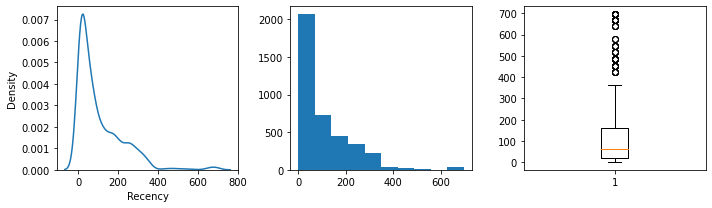

so outlier (UPPER) =  71
so outlier (LOWER) =  0
% outlier =  1.810762560571283 %


In [ ]:
#Recency
Q1_Recency= np.percentile(df_RFM.Recency, 25)
Q3_Recency= np.percentile(df_RFM.Recency, 75) 
iqr_Recency= scipy.stats.iqr(df_RFM.Recency) 
var = df_RFM.Recency.var()
std = df_RFM.Recency.std() 
skew = df_RFM.Recency.skew() 
kurtosis = df_RFM.Recency.kurtosis() 
#---------------------------------------------------
if skew > 0:
    print('skew = ', skew, '(> 0): Phan phoi lech phai')
elif skew == 0:
    print('skew = 0: Phan phoi khong lech so voi phan phoi chuan') 
else:
    print('skew = ', skew,'(< 0): Phan phoi lech trai')

if kurtosis > 0:
    print('kurtosis = ', kurtosis, '(> 0): Phan phoi nhon hon phan phoi chuan')
elif kurtosis == 0:
    print('kurtosis = 0: Phan phoi co do nhon bang phan phoi chuan')
else:
    print('kurtosis = ', kurtosis, '(< 0): Phan phoi khong nhon bang phan phoi chuan')

print('Q1 = ', Q1_Recency, ', Q3 = ', Q3_Recency, ', IQR = ', iqr_Recency)
print('var = ', var, ', std = ', std)
#Visualization
plt.figure(figsize=(10, 3), tight_layout=True)
plt.subplot(1, 3, 1) 
sns.kdeplot(df_RFM['Recency'])
plt.subplot(1, 3, 2)
plt.hist(df_RFM['Recency']) 
plt.subplot(1, 3, 3)
plt.boxplot(df_RFM['Recency']) 
plt.show() 
#------------------------------------
#So outlier 
n_o_upper = df_RFM[df_RFM['Recency'] > (Q3_Recency+ 1.5*iqr_Recency)].shape[0] 
n_o_lower = df_RFM[df_RFM['Recency'] < (Q1_Recency- 1.5*iqr_Recency)].shape[0]  
print('so outlier (UPPER) = ', n_o_upper) 
print('so outlier (LOWER) = ', n_o_lower) 
print('% outlier = ', (n_o_upper + n_o_lower) / df_RFM.shape[0] * 100 , '%' )


skew =  10.806240485679128 (> 0): Phan phoi lech phai
kurtosis =  218.83329768985627 (> 0): Phan phoi nhon hon phan phoi chuan
Q1 =  1.0 , Q3 =  5.0 , IQR =  4.0
var =  51.922832445909144 , std =  7.2057499572153585


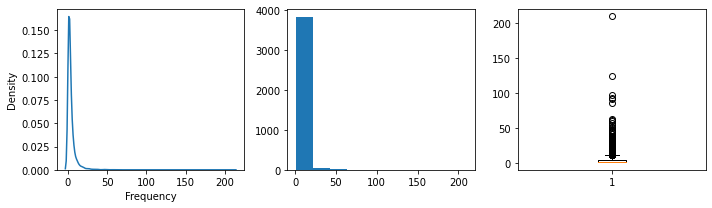

so outlier (UPPER) =  261
so outlier (LOWER) =  0
% outlier =  6.656465187452181 %


In [ ]:
#Frequency
Q1_Frequency= np.percentile(df_RFM.Frequency, 25)
Q3_Frequency= np.percentile(df_RFM.Frequency, 75) 
iqr_Frequency= scipy.stats.iqr(df_RFM.Frequency) 
var = df_RFM.Frequency.var()
std = df_RFM.Frequency.std() 
skew = df_RFM.Frequency.skew() 
kurtosis = df_RFM.Frequency.kurtosis() 
#---------------------------------------------------
if skew > 0:
    print('skew = ', skew, '(> 0): Phan phoi lech phai')
elif skew == 0:
    print('skew = 0: Phan phoi khong lech so voi phan phoi chuan') 
else:
    print('skew = ', skew,'(< 0): Phan phoi lech trai')

if kurtosis > 0:
    print('kurtosis = ', kurtosis, '(> 0): Phan phoi nhon hon phan phoi chuan')
elif kurtosis == 0:
    print('kurtosis = 0: Phan phoi co do nhon bang phan phoi chuan')
else:
    print('kurtosis = ', kurtosis, '(< 0): Phan phoi khong nhon bang phan phoi chuan')

print('Q1 = ', Q1_Frequency, ', Q3 = ', Q3_Frequency, ', IQR = ', iqr_Frequency)
print('var = ', var, ', std = ', std)
#Visualization
plt.figure(figsize=(10, 3), tight_layout=True)
plt.subplot(1, 3, 1) 
sns.kdeplot(df_RFM['Frequency'])
plt.subplot(1, 3, 2)
plt.hist(df_RFM['Frequency']) 
plt.subplot(1, 3, 3)
plt.boxplot(df_RFM['Frequency']) 
plt.show() 
#------------------------------------
#So outlier 
n_o_upper = df_RFM[df_RFM['Frequency'] > (Q3_Frequency+ 1.5*iqr_Frequency)].shape[0] 
n_o_lower = df_RFM[df_RFM['Frequency'] < (Q1_Frequency- 1.5*iqr_Frequency)].shape[0]  
print('so outlier (UPPER) = ', n_o_upper) 
print('so outlier (LOWER) = ', n_o_lower) 
print('% outlier = ', (n_o_upper + n_o_lower) / df_RFM.shape[0] * 100 , '%' )


skew =  19.627204915539394 (> 0): Phan phoi lech phai
kurtosis =  497.1624460507695 (> 0): Phan phoi nhon hon phan phoi chuan
Q1 =  210.15 , Q3 =  1107.8 , IQR =  897.65
var =  36087936.04705033 , std =  6007.323534407842


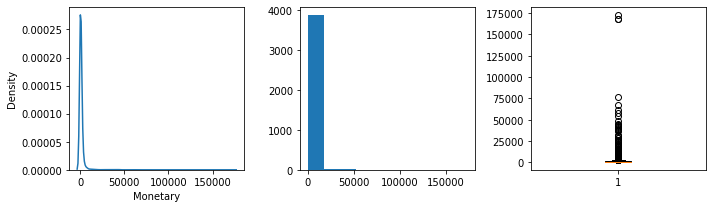

so outlier (UPPER) =  371
so outlier (LOWER) =  0
% outlier =  9.461871971435858 %


In [ ]:
#Monetary
Q1_Monetary= np.percentile(df_RFM.Monetary, 25)
Q3_Monetary= np.percentile(df_RFM.Monetary, 75) 
iqr_Monetary= scipy.stats.iqr(df_RFM.Monetary) 
var = df_RFM.Monetary.var()
std = df_RFM.Monetary.std() 
skew = df_RFM.Monetary.skew() 
kurtosis = df_RFM.Monetary.kurtosis() 
#---------------------------------------------------
if skew > 0:
    print('skew = ', skew, '(> 0): Phan phoi lech phai')
elif skew == 0:
    print('skew = 0: Phan phoi khong lech so voi phan phoi chuan') 
else:
    print('skew = ', skew,'(< 0): Phan phoi lech trai')

if kurtosis > 0:
    print('kurtosis = ', kurtosis, '(> 0): Phan phoi nhon hon phan phoi chuan')
elif kurtosis == 0:
    print('kurtosis = 0: Phan phoi co do nhon bang phan phoi chuan')
else:
    print('kurtosis = ', kurtosis, '(< 0): Phan phoi khong nhon bang phan phoi chuan')

print('Q1 = ', Q1_Monetary, ', Q3 = ', Q3_Monetary, ', IQR = ', iqr_Monetary)
print('var = ', var, ', std = ', std)
#Visualization
plt.figure(figsize=(10, 3), tight_layout=True)
plt.subplot(1, 3, 1) 
sns.kdeplot(df_RFM['Monetary'])
plt.subplot(1, 3, 2)
plt.hist(df_RFM['Monetary']) 
plt.subplot(1, 3, 3)
plt.boxplot(df_RFM['Monetary']) 
plt.show() 
#------------------------------------
#So outlier 
n_o_upper = df_RFM[df_RFM['Monetary'] > (Q3_Monetary+ 1.5*iqr_Monetary)].shape[0] 
n_o_lower = df_RFM[df_RFM['Monetary'] < (Q1_Monetary- 1.5*iqr_Monetary)].shape[0]  
print('so outlier (UPPER) = ', n_o_upper) 
print('so outlier (LOWER) = ', n_o_lower) 
print('% outlier = ', (n_o_upper + n_o_lower) / df_RFM.shape[0] * 100 , '%' )


Nhận xét:
- Cả 3 cột Recency, Frequency, Monetary đều lệch phải và nhọn hơn phân phối chuẩn
- Cả 3 cột đều có outlier. Ta không xóa các outlier này vì có thể có nhiều điều thú vị về các outlier như khách hàng mua nhiều, mua thường xuyên, ...

#Calculate RFM quartiles

In [ ]:
#tạo nhãn cho các cột Recency, Frequency, Monetary
#số ngày tính từ lần mua hàng cuối cùng càng lớn thì gán nhãn nhỏ, ngược lại gán nhãn lớn
r_labels = range(4, 0, -1) # 4,3, 2, 1
f_labels = range(1, 5) # 1, 2, 3, 4: tần suất mua hàng
m_labels = range(1, 5) #1, 2, 3, 4: số tiền đã chi

In [ ]:
[*r_labels]

[4, 3, 2, 1]

In [ ]:
#gán nhãn vào các nhóm tứ phân vị:
r_groups = pd.qcut(df_RFM['Recency'].rank(method='first'), q=4, labels=r_labels)
f_groups = pd.qcut(df_RFM['Frequency'].rank(method='first'), q=4, labels=f_labels)
m_groups = pd.qcut(df_RFM['Monetary'].rank(method='first'), q=4, labels=m_labels)

In [ ]:
#tạo ra các cột mới R, F, M
df_RFM = df_RFM.assign(R = r_groups.values, F = f_groups.values, M = m_groups.values)
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M
customer_id,,,,,,
18102,12,60,173369.02,4,4,4
16446,89,2,168472.50,2,2,4
17450,3,46,168263.41,4,4,4
12346,326,1,77183.60,1,1,4
16029,30,63,67534.04,3,4,4


#Concat RFM quartile values to create RFM Segment

In [ ]:
#Ghép các chữ số ở các cột R, F, M thành 1 cột đặt tên là RFM_Segment
def join_rfm(x): return str(int(x['R'])) + str(int(x['F'])) + str(int(x['M']))
df_RFM['RFM_Segment'] = df_RFM.apply(join_rfm, axis=1)

In [ ]:
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment
customer_id,,,,,,,
18102,12,60,173369.02,4,4,4,444
16446,89,2,168472.50,2,2,4,224
17450,3,46,168263.41,4,4,4,444
12346,326,1,77183.60,1,1,4,114
16029,30,63,67534.04,3,4,4,344


#Count the number of unique RFM_segment

In [ ]:
rfm_count_unique = df_RFM.groupby('RFM_Segment')['RFM_Segment'].nunique()

In [ ]:
rfm_count_unique.sum()

62

Nhận xét: có 62 tổ hợp của R, F, M (mỗi loại từ 1 đến 4). Vì 62 segments là quá nhiều, do đó chúng ta cần một phương pháp chính xác hơn để thực hiện phân loại các segment

#Calculate RFM score and level

In [ ]:
#Cộng các giá trị của các cột R, F, M để tạo thành RFM_Score
df_RFM['RFM_Score'] = df_RFM[['R', 'F', 'M']].sum(axis=1)
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
customer_id,,,,,,,,
18102,12,60,173369.02,4,4,4,444,12
16446,89,2,168472.50,2,2,4,224,8
17450,3,46,168263.41,4,4,4,444,12
12346,326,1,77183.60,1,1,4,114,6
16029,30,63,67534.04,3,4,4,344,11


#Manual Segmentation

###Phân loại các cấp độ khách hàng dựa trên 3 cột R, F, M

In [ ]:
def rfm_level(df):
  #mua gần đây, mua thường xuyên, mua nhiều tiền --> STAR
  if (df['R'] == 4 and df['F'] == 4 and df['M'] == 4):
    return 'STAR'
  #mua gần đây, tần suất thấp, ít tiền --> NEW
  elif (df['R'] == 4 and df['F'] == 1 and df['M'] == 1):
    return 'NEW'
  #nếu không phải 2 loại NEW và STAR
  else:
    #mua nhiều tiền --> BIG SPENDER
    if df['M'] == 4:
      return 'BIG SPENDER'
    #mua thường xuyên --> LOYAL
    elif df['F'] == 4:
      return 'LOYAL'
    #mua gần đây --> ACTIVE
    elif df['R'] == 4:
      return 'ACTIVE'
    #lần cuối cùng mua là rất lâu --> LOST
    elif df['R'] == 1:
      return 'LOST'
    #chi tiêu rất ít --> LIGHT
    elif df['M'] == 1:
      return 'LIGHT'
    #còn lại --> REGULAR
    return 'REGULAR'

In [ ]:
#thêm cột phân loại RFM_level vào
df_RFM['RFM_Level'] = df_RFM.apply(rfm_level, axis=1) 

In [ ]:
df_RFM.head(10)

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Level
customer_id,,,,,,,,,
18102,12,60,173369.02,4,4,4,444,12,STAR
16446,89,2,168472.50,2,2,4,224,8,BIG SPENDER
17450,3,46,168263.41,4,4,4,444,12,STAR
12346,326,1,77183.60,1,1,4,114,6,BIG SPENDER
16029,30,63,67534.04,3,4,4,344,11,BIG SPENDER
17511,6,31,61307.74,4,4,4,444,12,STAR
17949,3,45,57831.28,4,4,4,444,12,STAR
16684,12,28,54317.08,4,4,4,444,12,STAR
15061,5,48,48969.70,4,4,4,444,12,STAR


#Số lượng khách hàng trong mỗi nhóm

In [ ]:
df_RFM['RFM_Level'].value_counts()

REGULAR        952
LOST           930
BIG SPENDER    562
STAR           418
LIGHT          412
ACTIVE         381
LOYAL          230
NEW             36
Name: RFM_Level, dtype: int64

Nhận xét: với cách phân loại dựa trên RFM_Level, nhóm STARS đang có số lượng cũng khá nhiều, tuy nhiên cần lưu ý số lượng LOST phải quan tâm vì có số lượng gấp đôi STARS

#Calculate mean values for each segment

In [ ]:
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Level
customer_id,,,,,,,,,
18102,12,60,173369.02,4,4,4,444,12,STAR
16446,89,2,168472.50,2,2,4,224,8,BIG SPENDER
17450,3,46,168263.41,4,4,4,444,12,STAR
12346,326,1,77183.60,1,1,4,114,6,BIG SPENDER
16029,30,63,67534.04,3,4,4,344,11,BIG SPENDER


In [ ]:
#tính toán giá trị trung bình cho mỗi RFM_Level và trả về kích thước của từng segment
rfm_agg = df_RFM.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count'] #đếm số phần tử của Monetary --> số phần tử của segment
}).round(0)

rfm_agg.columns = rfm_agg.columns.droplevel()
rfm_agg.columns = ['RecencyMean', 'FrequencyMean', 'MonetaryMean', 'Count']
#tỷ lệ % của từng segment 
rfm_agg['Percent'] = round(rfm_agg['Count']/rfm_agg.Count.sum()*100,2)

#reset the index
rfm_agg = rfm_agg.reset_index()

In [ ]:
rfm_agg

,RFM_Level,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
0,ACTIVE,12.00,3.00,485.00,381,9.72
1,BIG SPENDER,68.00,7.00,3196.00,562,14.33
2,LIGHT,79.00,1.00,131.00,412,10.51
3,LOST,272.00,1.00,265.00,930,23.72
4,LOYAL,48.00,6.00,787.00,230,5.87
5,NEW,15.00,1.00,163.00,36,0.92
6,REGULAR,73.00,2.00,498.00,952,24.28
7,STAR,10.00,15.00,5917.00,418,10.66


#Tree map

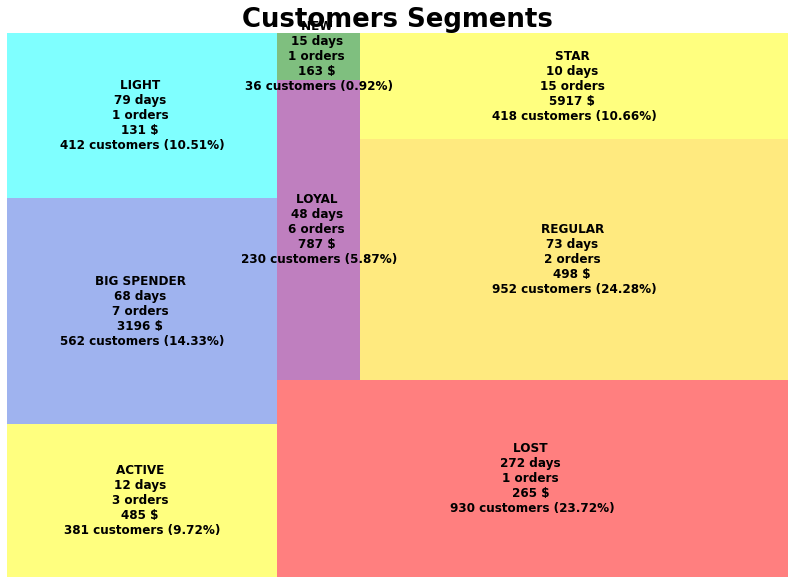

In [ ]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)

colors_dict = {'ACTIVE':'yellow','BIG SPENDER':'royalblue', 'LIGHT':'cyan',
               'LOST':'red', 'LOYAL':'purple', 'POTENTIAL':'green', 'STARS':'gold'}

squarify.plot(sizes=rfm_agg['Count'],
              text_kwargs={'fontsize':12,'weight':'bold', 'fontname':"sans serif"},
              color=colors_dict.values(),
              label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(*rfm_agg.iloc[i])
                      for i in range(0, len(rfm_agg))], alpha=0.5 )


plt.title("Customers Segments",fontsize=26,fontweight="bold")
plt.axis('off')

plt.savefig('RFM Segments.png')
plt.show()

Nhận xét: 
* Nhóm LOST đang chiếm 23.72% --> cần thực hiện hành động để khách hàng quay lại
* Nhóm STARS chiếm 10.66%, tỷ lệ tương đối tốt

#Scatter plot (RFM)

In [ ]:
import plotly.express as px

fig = px.scatter(rfm_agg, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="RFM_Level",
           hover_name="RFM_Level", size_max=100)
fig.show()

**Nhận xét lần lượt theo size (frequency) của các segment**
* Nhóm STARS có mức chi tiêu cao nhất, thời gian mua gần nhất ngắn. Mức chi tiêu của nhóm này gần như bằng mức chi tiêu của các nhóm khác cộng lại (trừ BIG SPENDER). Chúng ta cần tập trung chăm sóc nhóm này để mở rộng frequency và monetary hơn nữa. Khi đó chúng ta có thể hoàn toàn chỉ chú tâm đến nhóm này vì nó chiếm gần 50% monetary của công ty.
* Nhóm BIG SPENDER cũng là một nhóm cần quan tâm vì nhóm này có mức chi tiêu cũng cao, thời gian mua hàng gần nhất trung bình không quá xa. Cần có chiến dịch riêng để nhóm BIG SPENDER có thể giao dịch thường xuyên hơn. Khi đó có thể nhóm BIG SPENDER tiềm năng trở thành STARS.
* Nhóm LOYAL cũng rất tiềm năng vì nhóm này có thời gian quay lại mua tiếp theo ngắn, cần có chiến dịch cho nhóm này tăng giá trị giao dịch, có thể là khuyến mãi để họ mua những đơn hàng giá trị hơn, nhóm này tiềm năng trở thành BIG SPENDER.
* Nhóm ACTIVE là nhóm khách hàng mua gần đây nhất, tuy giá trị đơn hàng không lớn. Chiến dịch đề nghị với nhóm này là tăng số lần giao dịch (frequency), nhóm này có thể tiềm năng trở thành LOYAL hoặc tốt hơn nếu họ mua nhiều lần hơn.
* Nhóm REGULARS có thời gian mua hàng gần nhất trung bình, số lần mua trung bình và số tiền chi tiêu trung bình. Nhóm này hiện đang chiếm tỷ trọng nhỏ. Chiến lược đề nghị cho nhóm này là giảm thời gian mua gần nhất, để nhóm này hoạt động thường xuyên hơn và có thể trở thành nhóm ACTIVE.
* Nhóm NEW là các khách hàng mới tham gia. Số lần mua hàng ít và chi tiêu ít. Chiến dịch phù hợp cho nhóm này là tăng số lần mua hàng để cải thiện dần và có thể trở thành nhóm ACTIVE
* Nhóm LIGHT có thời gian mua gần nhất trung bình, giá trị giao dịch thấp và số lần giao dịch cũng thấp. Chiến dịch phù hợp với nhóm này là tăng số lần giao dịch (frequency) để có thể trở thành REGULARS.
* Nhóm LOST đã hơn 250 ngày không có giao dịch, cần các biện pháp khuyến mãi, chăm sóc riêng để khách hàng quay lại. Tuy nhiên, mức chi tiêu của nhóm này cũng không cao, nên cân nhắc giữa chi phí thực hiện việc chăm sóc khách quay lại và tiềm năng mua hàng của nhóm này. Hoặc có thể không khai thác nhóm này, mà tập trung các nhóm khác có thể mang đến lợi nhuận cao hơn

###3d Scatter Plot (RFM)

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df_RFM, x='Recency', y='Frequency', z='Monetary',
                    color = 'RFM_Level', opacity=0.5,
                    color_discrete_map = colors_dict)
fig.update_traces(marker=dict(size=5),
                  
                  selector=dict(mode='markers'))
fig.show()

#Bước 4 & 5: Modeling & Evaluation/ Analyze & Report

###KMeans cluster with Elbow method

In [ ]:
df_now = df_RFM[['Recency', 'Frequency', 'Monetary']]
df_now 

,Recency,Frequency,Monetary
customer_id,,,
18102,12,60,173369.02
16446,89,2,168472.50
17450,3,46,168263.41
12346,326,1,77183.60
16029,30,63,67534.04
...,...,...,...
17956,250,1,12.75
16454,45,2,6.90
14792,153,1,6.20


In [ ]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_now)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

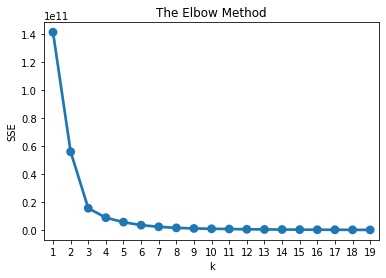

In [ ]:
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

Nhận xét: có thể chọn K = 7 vì từ K = 7 trở đi SSE giảm rất ít.

#GMM

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
#Dùng silhouette tính k có điểm tốt nhất
from sklearn import metrics 
list_sil = [] #chứa danh sách các giá trị sil
K = range(2,20) 
for k in K:
  gmm = GaussianMixture(n_components=k) #Dùng GMM với k = 2, 3, 4, ...
  gmm.fit(df_now)
  labels = gmm.predict(df_now)
  sil = metrics.silhouette_score(df_now, labels, metric='euclidean')
  list_sil.append(sil)

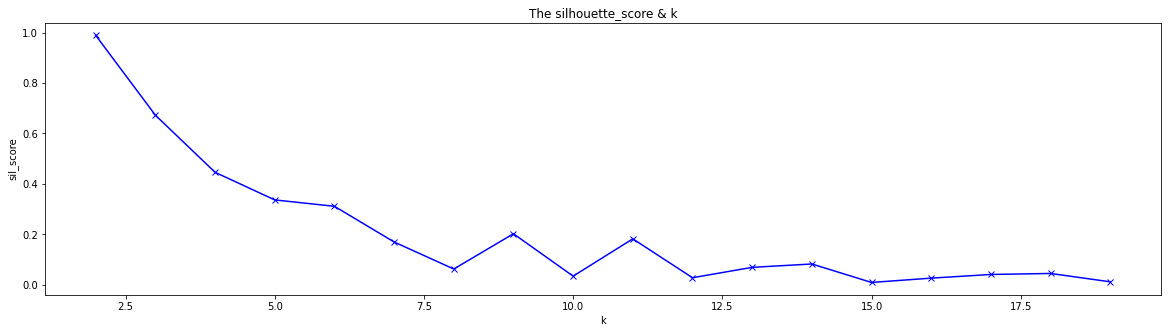

Index (K) của phần tử có sil_score lớn nhất 2


In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(K, list_sil, 'bx-')
plt.xlabel('k')
plt.ylabel('sil_score')
plt.title('The silhouette_score & k')
plt.show()
print('Index (K) của phần tử có sil_score lớn nhất', (list_sil.index(max(list_sil))) + 2)

Nhận xét: Index có sil_score lớn nhất là k = 2. Có khả năng 2 nhóm sẽ bao gồm nhóm STARS và các nhóm còn lại.

###Hierachical Clustering

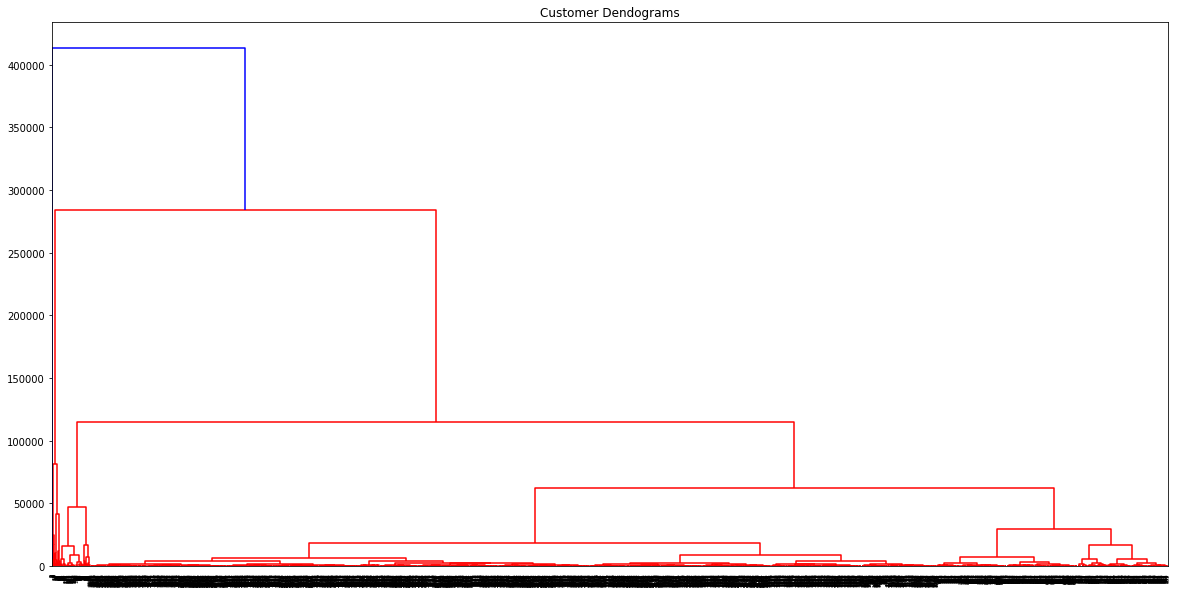

In [ ]:
from scipy.cluster import hierarchy
plt.figure(figsize=(20, 10))
plt.title('Customer Dendograms')
dend = hierarchy.dendrogram(hierarchy.linkage(df_now, method='ward'))

Nhận xét: nếu áp dụng Hierarchical clustering, có thể chia khách hàng làm 2 nhóm. Có thể sẽ là nhóm STARS và các nhóm còn lại

Nhận xét: 
* Ta có thể phân chia thành 7 nhóm theo KMeans hoặc 2 nhóm theo GMM hoặc Hierachical clustering đều phù hợp. 
* Lựa chọn thử nghiệm k = 7 theo KMeans

###KMeans với k = 7

In [ ]:
#Xây dựng model KMeans với k = 7
model = KMeans(n_clusters=7, random_state=42)
model.fit(df_now)
model.labels_.shape

(3921,)

In [ ]:
df_now["Cluster"] = model.labels_
df_now.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Recency Frequency  Monetary      
           mean      mean      mean count
Cluster                                  
0        118.21      2.57    493.04  3292
1         34.67     36.00 170034.98     3
2         20.82     37.27  41598.73    11
3         16.35     22.89   9231.01    71
4         43.33      9.73   2793.82   523
5         75.40     33.60  63634.75     5
6         20.44     49.88  24374.37    16

In [ ]:
#tương tự như rfm_agg, ta tiếp tục tính toán cho 7 cụm khách hàng mới các giá trị
#trung bình R, F, M, tỷ lệ % các nhóm, ...
rfm_agg2 = df_now.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(0)

rfm_agg2.columns = rfm_agg2.columns.droplevel()
rfm_agg2.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg2['Percent'] = round((rfm_agg2['Count']/rfm_agg2.Count.sum())*100, 2)

# Reset the index
rfm_agg2 = rfm_agg2.reset_index()

# Change thr Cluster Columns Datatype into discrete values
rfm_agg2['Cluster'] = 'Cluster '+ rfm_agg2['Cluster'].astype('str')

# Print the aggregated dataset
rfm_agg2

,Cluster,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
0,Cluster 0,118.00,3.00,493.00,3292,83.96
1,Cluster 1,35.00,36.00,170035.00,3,0.08
2,Cluster 2,21.00,37.00,41599.00,11,0.28
3,Cluster 3,16.00,23.00,9231.00,71,1.81
4,Cluster 4,43.00,10.00,2794.00,523,13.34
5,Cluster 5,75.00,34.00,63635.00,5,0.13
6,Cluster 6,20.00,50.00,24374.00,16,0.41


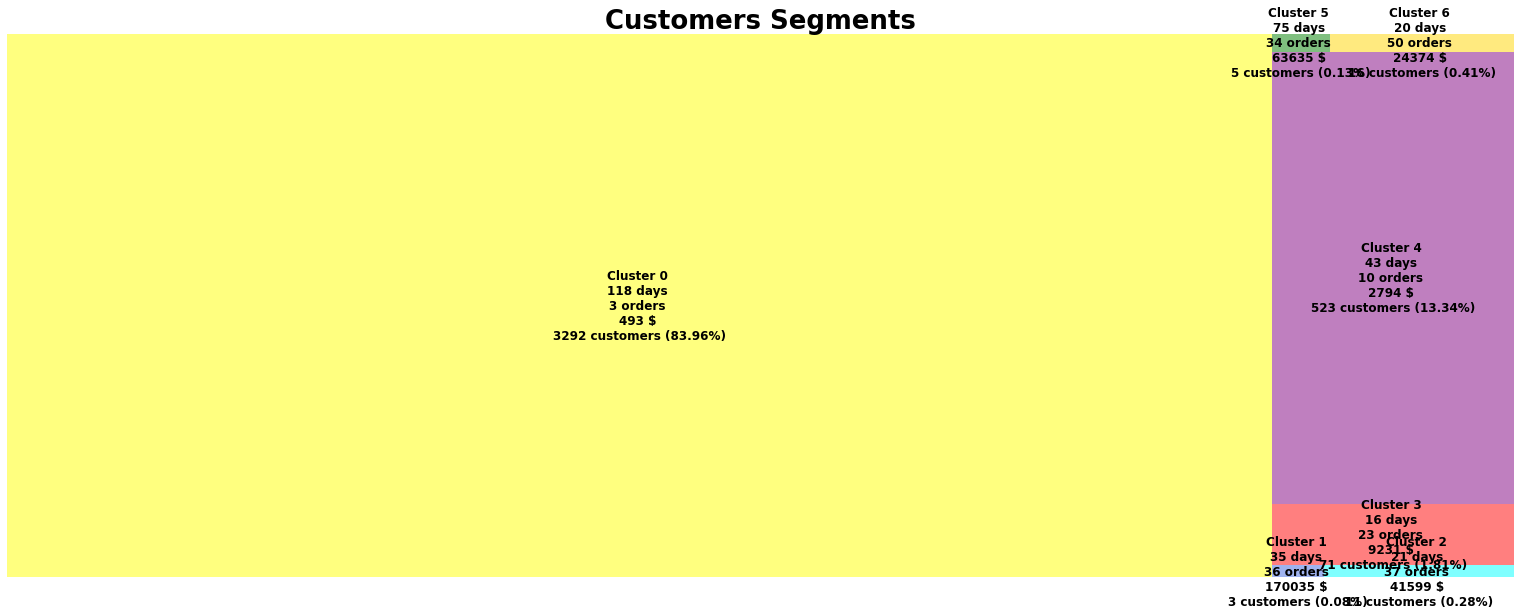

In [ ]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(27, 10)

colors_dict2 = {'Cluster0':'yellow','Cluster1':'royalblue', 'Cluster2':'cyan',
               'Cluster3':'red', 'Cluster4':'purple', 'Cluster5':'green', 'Cluster6':'gold'}

squarify.plot(sizes=rfm_agg2['Count'],
              text_kwargs={'fontsize':12,'weight':'bold', 'fontname':"sans serif"},
              color=colors_dict2.values(),
              label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(*rfm_agg2.iloc[i])
                      for i in range(0, len(rfm_agg2))], alpha=0.5 )


plt.title("Customers Segments",fontsize=26,fontweight="bold")
plt.axis('off')

plt.savefig('Unsupervised Segments.png')
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(rfm_agg2, x='RecencyMean', y='FrequencyMean', z='MonetaryMean',
                    color = 'Cluster', opacity=0.3)
fig.update_traces(marker=dict(size=20),
                  
                  selector=dict(mode='markers'))
fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter(rfm_agg2, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="Cluster",
           hover_name="Cluster", size_max=100)
fig.show()

Nhận xét
* Nhóm 0 có số lượng customer nhiều nhất, tuy nhiên chi tiêu lại thấp nhất và lần mua gần nhất xa nhất, số lần mua cũng ít nhất --> ta có thể không cần tập trung vào nhóm này.
* Nhóm 4 tốt hơn nhóm 0 ở tần suất mua hàng và số tiền. Tuy nhiên so với các nhóm khác chi tiêu cũng không nhiều.
* Điều thú vị trong phân nhóm khách hàng này là các nhóm 1, 2, 3, 6 có phần trăm khách hàng rất ít nhưng họ lại thường xuyên mua hàng, thời gian mua cũng khá gần và mua nhiều tiền. Các nhóm này nên được tập trung quan sát và chăm sóc

###GMM với k = 2

In [ ]:
df_now1 = df_RFM[['Recency', 'Frequency', 'Monetary']]
df_now1 

,Recency,Frequency,Monetary
customer_id,,,
18102,12,60,173369.02
16446,89,2,168472.50
17450,3,46,168263.41
12346,326,1,77183.60
16029,30,63,67534.04
...,...,...,...
17956,250,1,12.75
16454,45,2,6.90
14792,153,1,6.20


In [ ]:
gmm = GaussianMixture(n_components=2)
gmm.fit(df_now1)

GaussianMixture(n_components=2)

In [ ]:
#Dự đoán nhóm từ gmm đã tạo và df_now1
types = gmm.predict(df_now1)
types 

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
#tạo cột Cluster dự đoán
df_now1['Cluster'] = types 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_now1.head() 

,Recency,Frequency,Monetary,Cluster
customer_id,,,,
18102,12,60,173369.02,1
16446,89,2,168472.50,1
17450,3,46,168263.41,1
12346,326,1,77183.60,0
16029,30,63,67534.04,0


In [ ]:
df_now1.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(2)

Recency Frequency  Monetary      
           mean      mean      mean count
Cluster                                  
0        105.64      4.22   1252.02  3918
1         34.67     36.00 170034.98     3

In [ ]:
#tương tự như rfm_agg, ta tiếp tục tính toán cho 2 cụm khách hàng mới các giá trị
#trung bình R, F, M, tỷ lệ % các nhóm, ...
rfm_agg3 = df_now1.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(0)

rfm_agg3.columns = rfm_agg3.columns.droplevel()
rfm_agg3.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg3['Percent'] = round((rfm_agg3['Count']/rfm_agg3.Count.sum())*100, 2)

# Reset the index
rfm_agg3 = rfm_agg3.reset_index()

# Change thr Cluster Columns Datatype into discrete values
rfm_agg3['Cluster'] = 'Cluster '+ rfm_agg3['Cluster'].astype('str')

# Print the aggregated dataset
rfm_agg3

,Cluster,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
0,Cluster 0,106.00,4.00,1252.00,3918,99.92
1,Cluster 1,35.00,36.00,170035.00,3,0.08


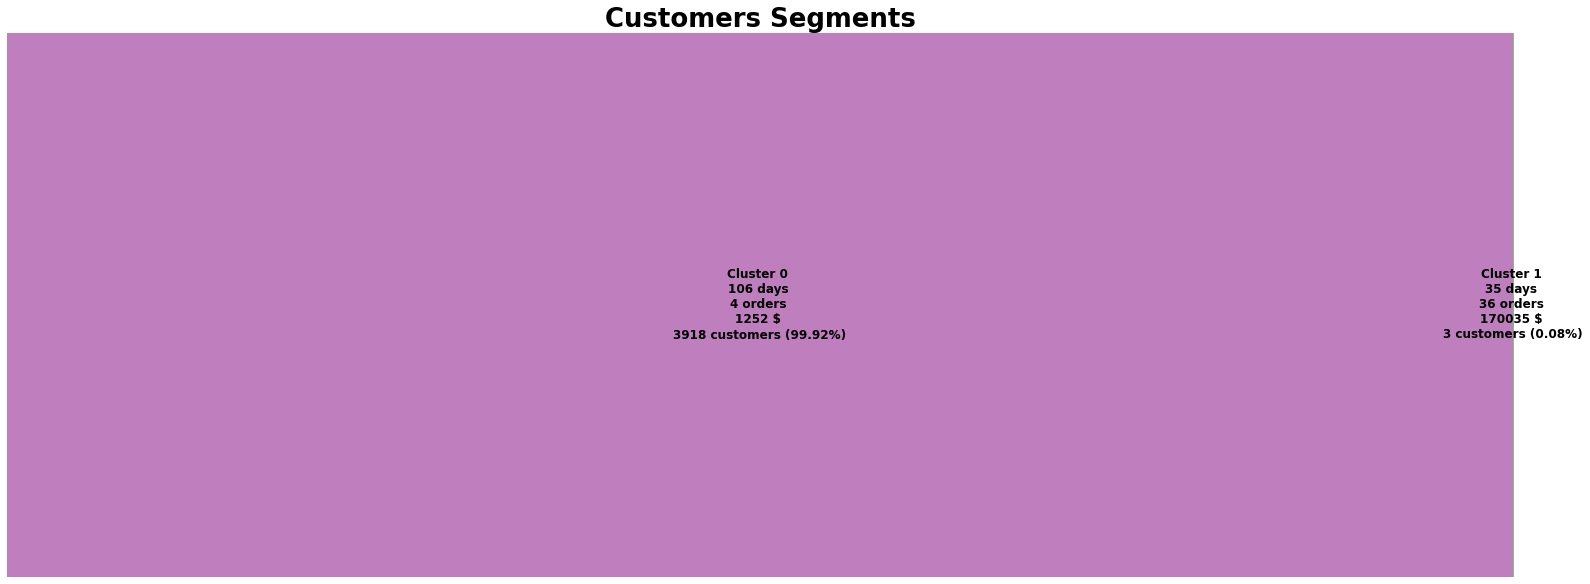

In [ ]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(27, 10)

colors_dict2 = {'Cluster0':'purple','Cluster1':'green'}

squarify.plot(sizes=rfm_agg3['Count'],
              text_kwargs={'fontsize':12,'weight':'bold', 'fontname':"sans serif"},
              color=colors_dict2.values(),
              label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(*rfm_agg3.iloc[i])
                      for i in range(0, len(rfm_agg3))], alpha=0.5 )


plt.title("Customers Segments",fontsize=26,fontweight="bold")
plt.axis('off')

plt.savefig('Unsupervised Segments.png')
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(rfm_agg3, x='RecencyMean', y='FrequencyMean', z='MonetaryMean',
                    color = 'Cluster', opacity=0.3)
fig.update_traces(marker=dict(size=20),
                  
                  selector=dict(mode='markers'))
fig.show()

In [ ]:
fig = px.scatter(rfm_agg3, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="Cluster",
           hover_name="Cluster", size_max=100)
fig.show()

Nhận xét
* Khi chia thành 2 nhóm thì ta nhận thấy rằng nhóm 0 là nhóm có tần suất mua hàng ít, mua cách xa và mua không nhiều tiền. Trong khi nhóm 1 lại có số tiền chi tiêu, số lần mua và lần mua gần đây tốt hơn.
* Số khách hàng nhóm 0 gấp 5 lần số khách hàng nhóm 1. Do đó chiến lược phù hợp có thể là mở rộng số khách hàng nhóm 1 hoặc tăng tần suất mua hàng của họ.

#Nhận xét chung
* Từ 2 model KMeans chia 7 nhóm (tuy nhiên các nhóm tích cực lại có phần giống nhau), GMM chia thành 2 nhóm, ta nhận thấy như sau :    
* Nếu muốn tập trung vào từng nhóm khách hàng riêng, dù có hơi giống nhau, Kmeans là phù hợp
* Nếu muốn quản lý chung khách hàng, không phân quá nhiều loại khách hàng thì GMM là phù hợp